<a href="https://colab.research.google.com/github/HeshanNavindu-7/Brain-Tumor-MRI/blob/main/Brain_Tumor_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install opendatasets

In [2]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt
import opendatasets as od
import os
import random
import matplotlib.pyplot as plt
import cv2





In [3]:
od.download("https://www.kaggle.com/datasets/masoudnickparvar/brain-tumor-mri-dataset/data")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: heshannavindu
Your Kaggle Key: ··········


100%|██████████| 149M/149M [00:01<00:00, 121MB/s]


In [4]:
#define path
dataset_dir="/content/brain-tumor-mri-dataset"
class_count={}
for mri_class in os.listdir(dataset_dir):
  print(mri_class)
  class_dir= os.path.join(dataset_dir,mri_class)
  if os.path.isdir(class_dir):
    num_images=len(os.listdir(class_dir))
    class_count[mri_class]=num_images


Testing
Training


Train Data
Displaying 4 samples from 'glioma' class:
Displaying 4 samples from 'meningioma' class:
Displaying 4 samples from 'notumor' class:
Displaying 4 samples from 'pituitary' class:


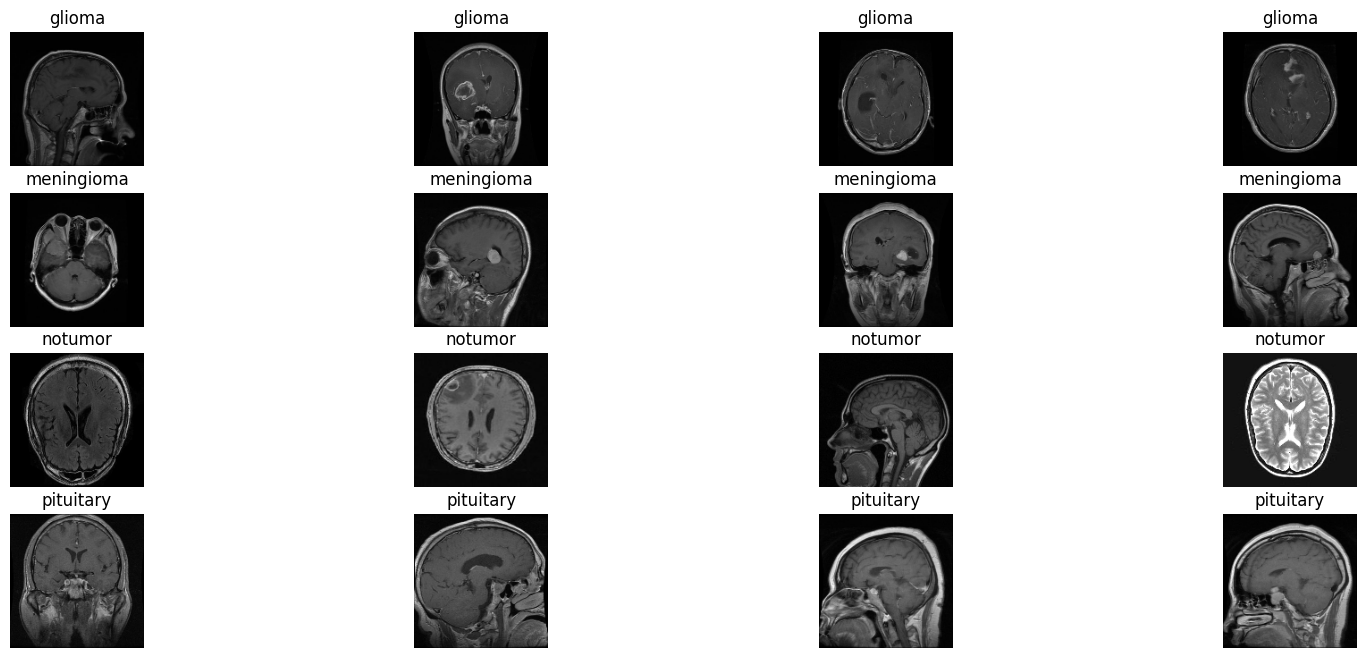

Test Data
Displaying 4 samples from 'glioma' class:
Displaying 4 samples from 'meningioma' class:
Displaying 4 samples from 'notumor' class:
Displaying 4 samples from 'pituitary' class:


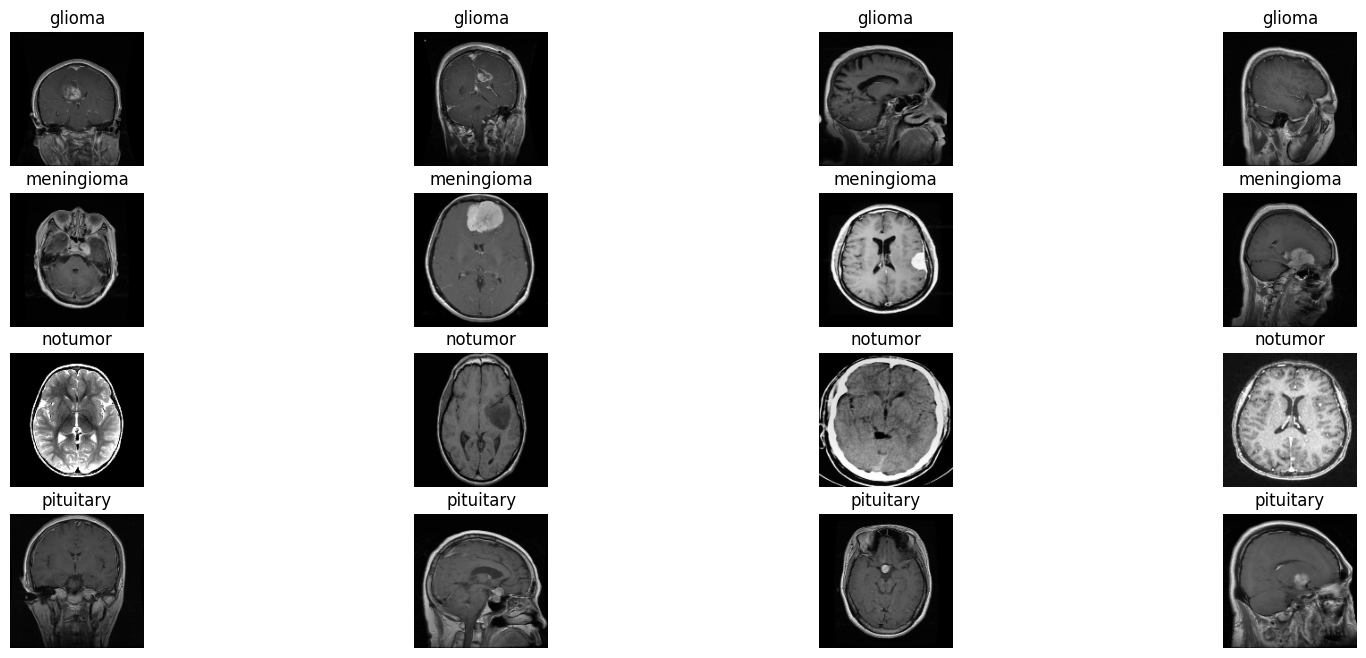

In [5]:

# Define subdirectories for train and test data
train_dir = '/content/brain-tumor-mri-dataset/Training'
test_dir = '/content/brain-tumor-mri-dataset/Testing'

# Define image size and batch size
target_size = (150, 150)
batch_size = 32

# Define classes
classes = ['glioma', 'meningioma','notumor','pituitary']

# Display sample data
def display_sample(directory, num_samples=4):
    fig, axs = plt.subplots(len(classes), num_samples, figsize=(20, 8))
    for i, class_name in enumerate(classes):
        class_dir = os.path.join(directory, class_name)
        print(f"Displaying {num_samples} samples from '{class_name}' class:")

        for j, filename in enumerate(os.listdir(class_dir)):
            if j >= num_samples:
                break
            img_path = os.path.join(class_dir, filename)
            img = cv2.imread(img_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
            img = cv2.resize(img, target_size)  # Resize image
            axs[i, j].imshow(img)
            axs[i, j].axis('off')
            axs[i, j].set_title(class_name)
    plt.show()

print("Train Data")
display_sample(train_dir)
print("Test Data")
display_sample(test_dir)

## preprocessing and augmenting

In [7]:
import os
import cv2
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define image size and batch size
target_size = (150, 150)
batch_size = 32

# Define data generators for train and test data
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Flow train and test images from directories
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=target_size,
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=target_size,
    batch_size=batch_size,
    class_mode='categorical'
)


Found 5712 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.


## Build DL Model

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define model architecture
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(4, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)       0

In [9]:
!pip install visualkeras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.8/993.8 kB 5.2 MB/s eta 0:00:00


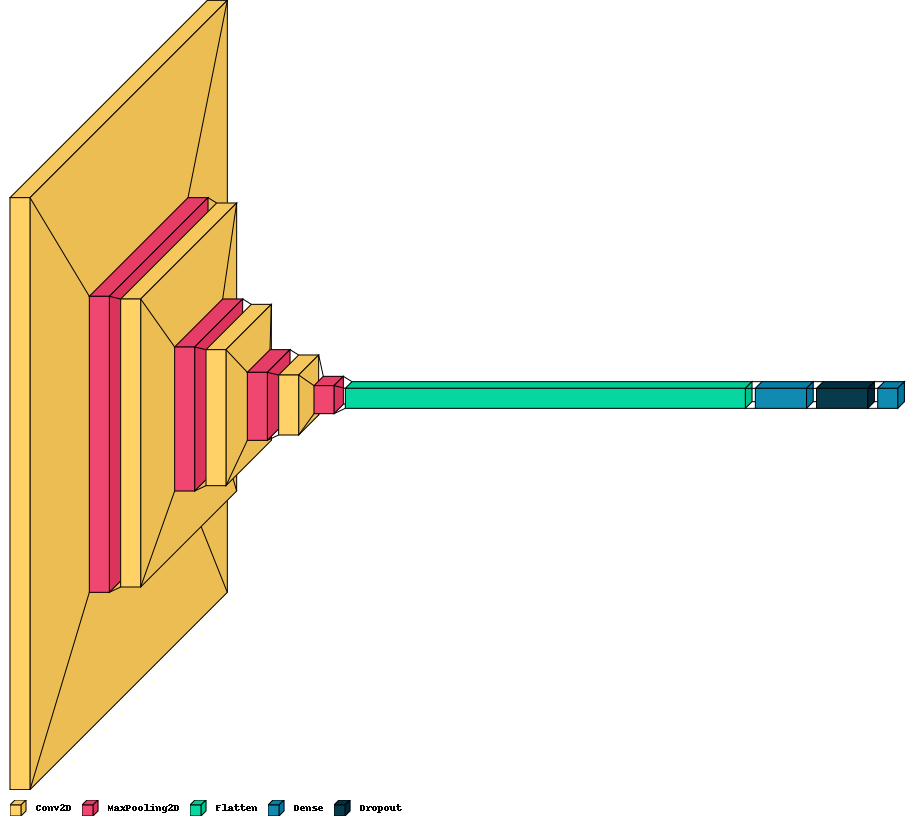

In [10]:
import visualkeras
visualkeras.layered_view(model, legend=True)

In [11]:
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=10,
    validation_data=test_generator,
    validation_steps=test_generator.samples // batch_size
)

Epoch 1/10
178/178 [==============================] - 311s 2s/step - loss: 0.7528 - accuracy: 0.6748 - val_loss: 0.5573 - val_accuracy: 0.7688
Epoch 2/10
178/178 [==============================] - 306s 2s/step - loss: 0.4123 - accuracy: 0.8444 - val_loss: 0.3801 - val_accuracy: 0.8414
Epoch 3/10
178/178 [==============================] - 301s 2s/step - loss: 0.2919 - accuracy: 0.8908 - val_loss: 0.3420 - val_accuracy: 0.8711
Epoch 4/10
178/178 [==============================] - 302s 2s/step - loss: 0.2093 - accuracy: 0.9215 - val_loss: 0.2120 - val_accuracy: 0.9133
Epoch 5/10
178/178 [==============================] - 302s 2s/step - loss: 0.1539 - accuracy: 0.9449 - val_loss: 0.2001 - val_accuracy: 0.9281
Epoch 6/10
178/178 [==============================] - 300s 2s/step - loss: 0.1189 - accuracy: 0.9572 - val_loss: 0.1388 - val_accuracy: 0.9484
Epoch 7/10
178/178 [==============================] - 306s 2s/step - loss: 0.0786 - accuracy: 0.9729 - val_loss: 0.1592 - val_accuracy: 0.9500

In [12]:
# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(test_generator)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

41/41 [==============================] - 28s 693ms/step - loss: 0.1847 - accuracy: 0.9458
Test Loss: 0.18472951650619507
Test Accuracy: 0.9458428621292114


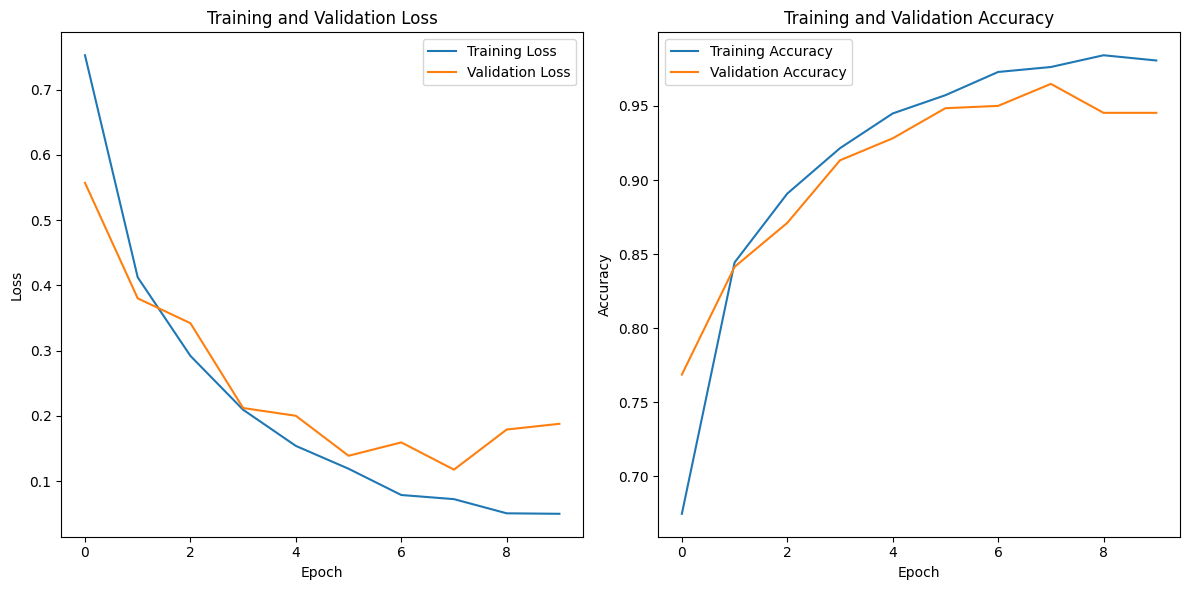

In [13]:
import matplotlib.pyplot as plt

# Create subplots for loss and accuracy
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot training and validation loss
ax1.plot(history.history['loss'], label='Training Loss')
ax1.plot(history.history['val_loss'], label='Validation Loss')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.set_title('Training and Validation Loss')
ax1.legend()

# Plot training and validation accuracy
ax2.plot(history.history['accuracy'], label='Training Accuracy')
ax2.plot(history.history['val_accuracy'], label='Validation Accuracy')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy')
ax2.set_title('Training and Validation Accuracy')
ax2.legend()

# Adjust layout
plt.tight_layout()
plt.show()

In [14]:

print("Results")
result = model.evaluate_generator(test_generator, verbose=1)

print("%s%.2f" % ("Loss     : ", result[0]))
print("%s%.2f%s" % ("Accuracy : ", result[1] * 100, "%"))

Results


<ipython-input-14-11f1a34e3d1a>:2: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  result = model.evaluate_generator(test_generator, verbose=1)


41/41 [==============================] - 21s 501ms/step - loss: 0.1847 - accuracy: 0.9458
Loss     : 0.18
Accuracy : 94.58%


In [16]:
# Save the trained model
model.save('my_model.keras')

In [19]:
model.save('saved_model')

In [20]:
import tensorflow as tf

# Convert the SavedModel to TensorFlow Lite format
converter = tf.lite.TFLiteConverter.from_saved_model('saved_model')
tflite_model = converter.convert()

# Save the TensorFlow Lite model to a file
with open('model.tflite', 'wb') as f:
    f.write(tflite_model)


In [21]:
converter.optimizations = [tf.lite.Optimize.DEFAULT]
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS, tf.lite.OpsSet.SELECT_TF_OPS]
converter.experimental_new_converter = True  # Use the new converter for better compatibility

# Save the TensorFlow Lite model to a file
with open('model.tflite', 'wb') as f:
    f.write(tflite_model)
